<h1>Customer Segmentation with K-Means Algorithm.<h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Load dataframe
df = pd.read_csv("Customers.csv")
#Check data
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


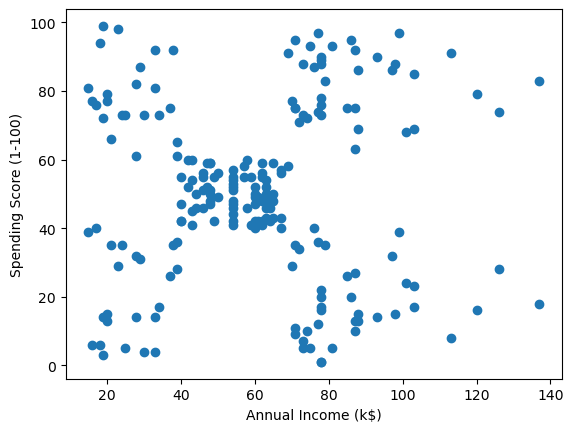

In [5]:
#Let's visualize the dataset
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [6]:
#Let short the some variable name
df.rename(columns= {'Annual Income (k$)' : 'income'}, inplace=True)
df.rename(columns= {'Spending Score (1-100)' : 'score'}, inplace=True)

In [7]:
#Normalization of the data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])
scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])
#Check the normalized data
print('--HEAD--')
df.head()

--HEAD--


,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [8]:
print('--TAIL--')
df.tail()

--TAIL--


,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [9]:
#Determine the K value between 1,11
k_range = range(1,11)
list_dist = []
for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df[["income","score"]])
    list_dist.append(kmeans_model.inertia_)

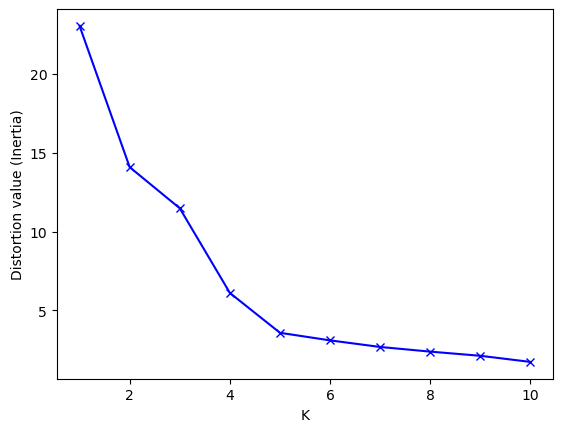

In [10]:
#Plot the K
plt.xlabel('K')
plt.ylabel('Distortion value (Inertia)')
plt.plot(k_range, list_dist, 'bx-')
plt.show()


According to the Elbow method, the best K value is the most significant breaking point. So K=5

In [11]:
#Create the model for K=5
kmeans_model = KMeans(n_clusters=5)
y_predicted = kmeans_model.fit_predict(df[['income','score']])
y_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [12]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,2
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,2
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,2


In [13]:
#See centroids
kmeans_model.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.32695811, 0.49533888],
       [0.08792846, 0.19619666],
       [0.59631148, 0.16921769],
       [0.08792846, 0.79962894]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


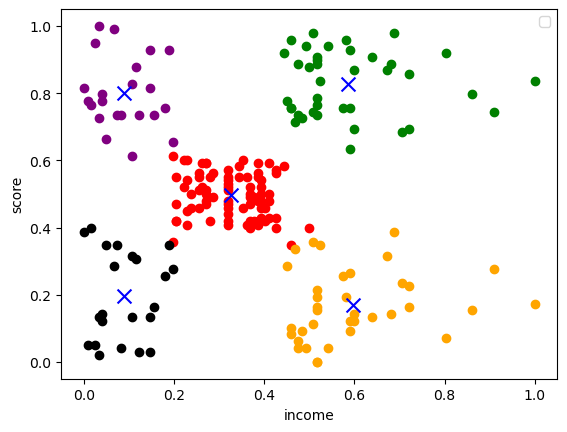

In [21]:
#Plot the centroids
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.xlabel('income')
plt.ylabel('score')

plt.scatter(df1['income'], df1['score'], color='green')
plt.scatter(df2['income'], df2['score'], color='red')
plt.scatter(df3['income'], df3['score'], color='black')
plt.scatter(df4['income'], df4['score'], color='orange')
plt.scatter(df5['income'], df5['score'], color='purple')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='blue', marker='x', s=100)
plt.legend()
plt.show()

In [27]:
#Test the model with an input with the
income=0.8
score=0.4

prediction = kmeans_model.predict([[income, score]])
prediction

if 0 in prediction:
    print('Customer belongs to cluster green')
elif 1 in prediction:
    print('Customer belongs to cluster red')
elif 2 in prediction:
    print('Customer belongs to cluster black')
elif 3 in prediction:
    print('Customer belongs to cluster orange')
else:
    print('Customer belongs to cluster purple')


Customer belongs to cluster orange


/Users/halil/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
